# PARTE 1 - ANÁLISE INICIAL (EDA) - Diabetes Dataset

## Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

In [ ]:
# 1. Carregar o dataset

data = load_diabetes(as_frame=True)
df = data.frame.copy()
df['target'] = data.target

print("✅ Dataset carregado com sucesso!")
print(f"Dimensões: {df.shape}")
print("\nColunas:", df.columns.tolist())

✅ Dataset carregado com sucesso!
Dimensões: (442, 11)

Colunas: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']


In [ ]:
# 2. Visualização inicial

print("\nPré-visualização dos dados:")
print(df.head())

print("\nInformações gerais:")
print(df.info())

print("\nEstatísticas descritivas:")
print(df.describe())


Pré-visualização dos dados:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    fl

## Explicando os Variaves


| Variável                   | Significado                                | Explicação detalhada                                                                                                                                                                                                                                                                                                     |
| -------------------------- | ------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **age**                    | Idade                                      | Representa a idade do paciente, mas **normalizada** (escalada). Os valores reais foram transformados para que a média seja 0 e o desvio padrão 1, por isso aparecem números pequenos como 0.03, -0.08 etc.|
| **sex**                    | Sexo biológico                             | Também **padronizado**. O `scikit-learn` converteu o gênero em uma variável numérica binária (0 ou 1), e depois padronizou (z-score). Assim, os valores positivos (~0.05) geralmente indicam **masculino**, e os negativos (~-0.04) **feminino**. Mas não há “masculino/feminino” explícito, é uma variável codificada. |
| **bmi**                    | Body Mass Index (Índice de Massa Corporal) | Representa o IMC (peso/altura²) normalizado. Valores mais altos indicam pacientes com maior IMC — geralmente correlacionam com risco maior de diabetes.                                                                                                                                                                  |
| **bp**                     | Blood Pressure (pressão arterial média)    | Média da pressão arterial diastólica e sistólica, também normalizada.                                                                                                                                                                                                                                                    |
| **s1, s2, s3, s4, s5, s6** | Medições séricas (sanguíneas)              | São medidas laboratoriais de lipídios, colesterol e outros marcadores metabólicos (sem nomes explícitos no dataset) e pode se referir apenas a ordem que foi tirada as amostras. Exemplo: A amostra S1 foi tirada com o paciente em jejun de 8h. Esse resultado mede a glicemia basal.                                                                                                    |
| **target**                 | Progressão da doença                       | Valor contínuo que mede o grau de progressão da diabetes após 1 ano (quanto maior, pior o quadro). O objetivo é prever essa variável.

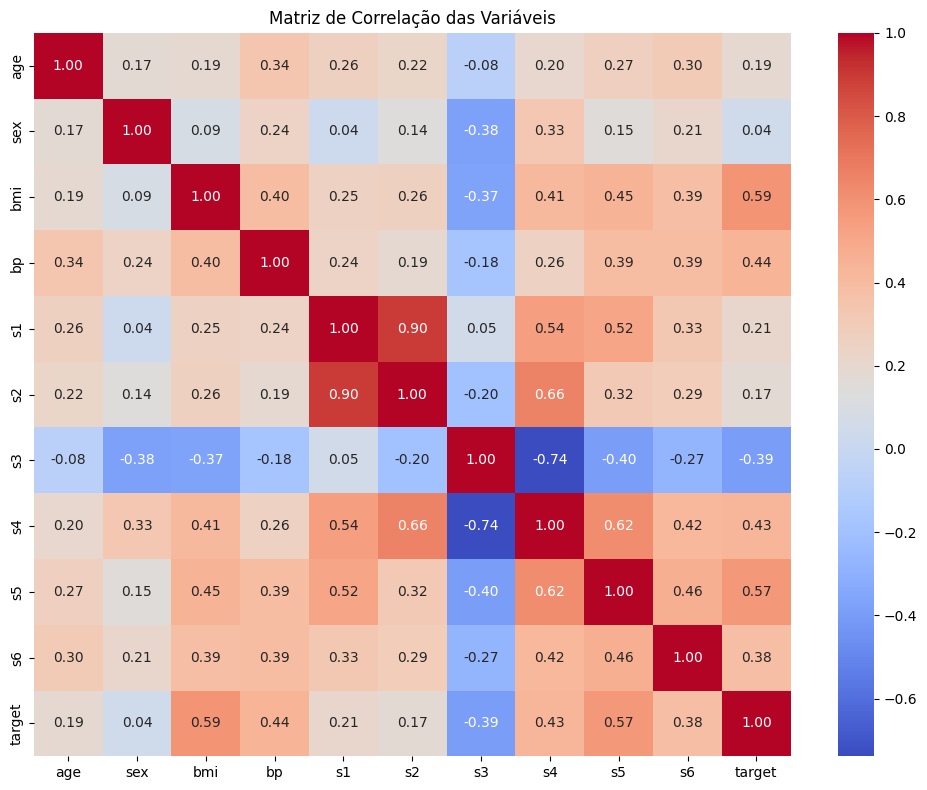

In [ ]:
# 3. Correlação entre variáveis

corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação das Variáveis")
plt.tight_layout()
plt.show()

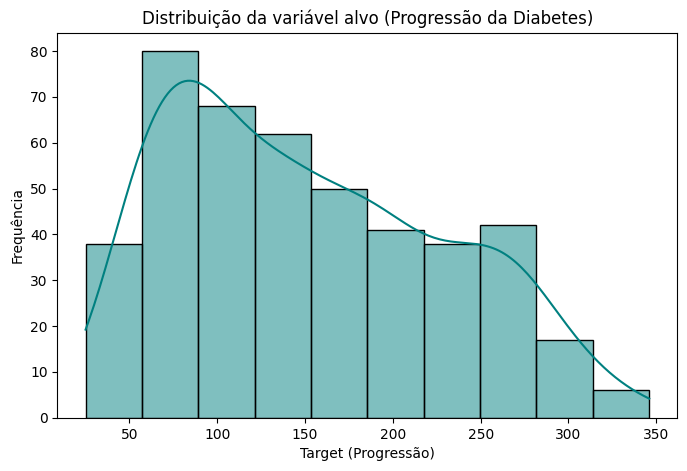

In [ ]:
# 4. Distribuição da variável alvo

plt.figure(figsize=(8, 5))
sns.histplot(df["target"], kde=True, color="teal")
plt.title("Distribuição da variável alvo (Progressão da Diabetes)")
plt.xlabel("Target (Progressão)")
plt.ylabel("Frequência")
plt.show()

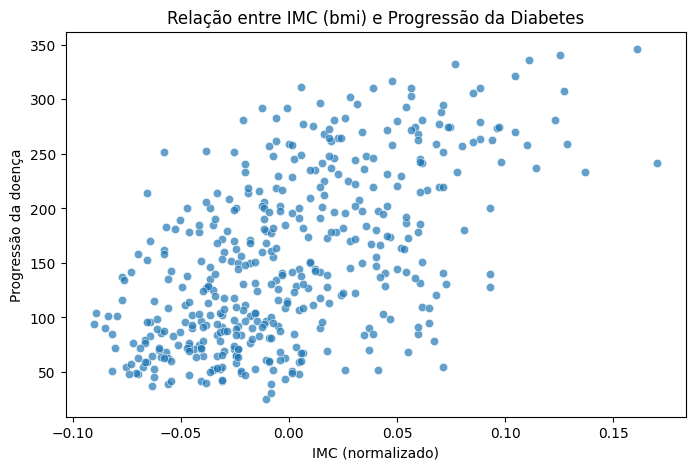

In [ ]:
# 5. Relação entre IMC (bmi) e Target

plt.figure(figsize=(8, 5))
sns.scatterplot(x="bmi", y="target", data=df, alpha=0.7)
plt.title("Relação entre IMC (bmi) e Progressão da Diabetes")
plt.xlabel("IMC (normalizado)")
plt.ylabel("Progressão da doença")
plt.show()

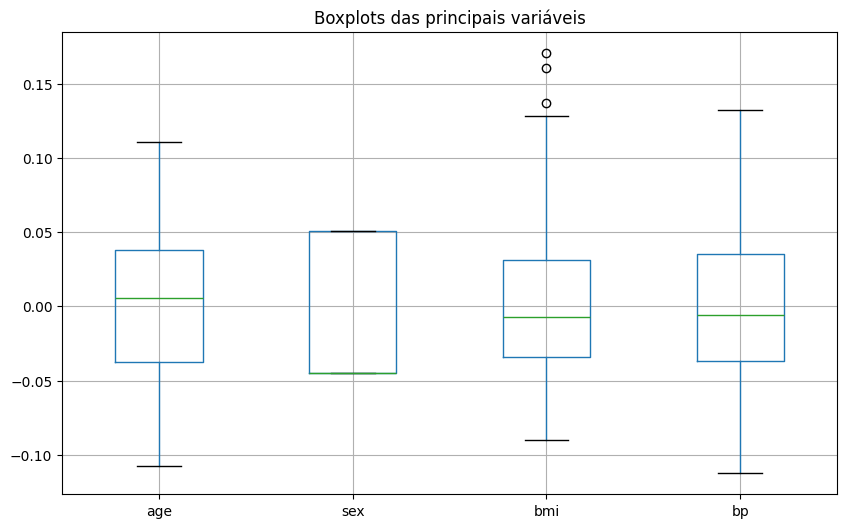

In [ ]:
# 6. Boxplots para detectar possíveis outliers

features = ["age", "sex", "bmi", "bp"]
plt.figure(figsize=(10, 6))
df[features].boxplot()
plt.title("Boxplots das principais variáveis")
plt.show()

## Relatório — Análise Exploratória Inicial (EDA)
### Pré-visualização dos dados

- O dataset de Diabetes contém 442 observações e 11 variáveis, todas numéricas e já normalizadas (média ≈ 0 e desvio padrão ≈ 0.0476).
A variável target representa a progressão da doença após um ano de acompanhamento, sendo a variável alvo (y).

- Nenhuma coluna possui valores ausentes (NaN), o que facilita o pré-processamento.
As variáveis age, sex, bmi, bp, s1 a s6 representam características clínicas e laboratoriais dos pacientes.

### Matriz de correlação

- A matriz de correlação mostra as relações lineares entre as variáveis.
Os principais pontos observados são:

- bmi (Índice de Massa Corporal) apresenta a maior correlação positiva com a variável alvo (target) (≈ 0.59).
➜ Isso indica que pacientes com IMC mais alto tendem a apresentar maior progressão da diabetes.

- bp (Pressão arterial média) e s5 (níveis de colesterol relacionados ao LDL) também possuem correlação moderada positiva com o target.

- As variáveis s1, s2 e s4 estão fortemente correlacionadas entre si (acima de 0.9), sugerindo colinearidade — algo a considerar nos modelos supervisionados.

- sex mostra correlação muito baixa com target (≈ 0.04), indicando que o sexo biológico não é determinante na progressão da doença neste conjunto de dados.

### Distribuição da variável alvo

- A variável target (progressão da diabetes) apresenta uma distribuição assimétrica à direita, concentrando a maior parte dos pacientes entre 50 e 200 pontos de progressão.
Poucos pacientes possuem valores acima de 300, considerados casos mais severos.

- Essa distribuição mostra que o dataset contém maioria de pacientes com progressão leve a moderada.

### Relação entre IMC e progressão da doença

- O gráfico de dispersão entre bmi e target mostra tendência claramente crescente:
quanto maior o IMC, maior tende a ser a progressão da diabetes.

- Isso reforça a ideia de que o excesso de peso é um fator de risco relevante para o avanço da doença.

### Boxplots das principais variáveis

- Os boxplots permitem observar a distribuição e presença de outliers:

- bmi apresenta alguns valores acima do esperado (outliers), indicando pacientes com IMC muito alto.

- age e bp têm distribuições relativamente simétricas, sem valores extremos relevantes.

- sex possui apenas dois níveis, refletindo a variável binária transformada para forma numérica.

### Conclusão inicial

<p>A análise exploratória sugere que:</p>

- O IMC é o principal preditor da progressão da diabetes neste conjunto de dados.

- O sexo tem impacto mínimo.

- Há colinearidade entre algumas variáveis laboratoriais (s1, s2, s4), o que pode afetar alguns modelos supervisionados.

- O dataset está limpo, balanceado e pronto para aplicação de técnicas de Machine Learning.

# Parte 2 - APRENDIZAGEM SUPERVISIONADA

### Importes

In [ ]:
# ETAPA 2 - APRENDIZAGEM SUPERVISIONADA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Carregar os dados
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

### Tratamento

In [ ]:
# TRATAMENTO DOS DADOS

#  4. Tratar valores ausentes
# Estratégia: preencher numéricos com média e categóricos com moda
for col in df.columns:
    if df[col].dtype in ["float64", "int64"]:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

#  5. Padronizar tipos de dados
if "sex" in df.columns:
    df["sex"] = df["sex"].astype("category")
if "smoker" in df.columns:
    df["smoker"] = df["smoker"].astype("category")

#  6. Detecção e tratamento de outliers (IQR)
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)


### Modelos

In [ ]:
# Divisão em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 1. Regressão Linear

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
# 2. Ridge Regression

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [ ]:
# 3. Lasso Regression

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [ ]:
# 4. Random Forest Regressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Avaliação dos modelos

def avaliar_modelo(nome, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return pd.Series({'Modelo': nome, 'RMSE': rmse, 'R²': r2})

resultados = pd.DataFrame([
    avaliar_modelo('Linear Regression', y_test, y_pred_lr),
    avaliar_modelo('Ridge Regression', y_test, y_pred_ridge),
    avaliar_modelo('Lasso Regression', y_test, y_pred_lasso),
    avaliar_modelo('Random Forest', y_test, y_pred_rf)
])

print("Resultados dos Modelos Supervisionados:")
print(resultados)

Resultados dos Modelos Supervisionados:
              Modelo       RMSE        R²
0  Linear Regression  53.853446  0.452603
1   Ridge Regression  55.474462  0.419153
2   Lasso Regression  53.652208  0.456686
3      Random Forest  54.332408  0.442823


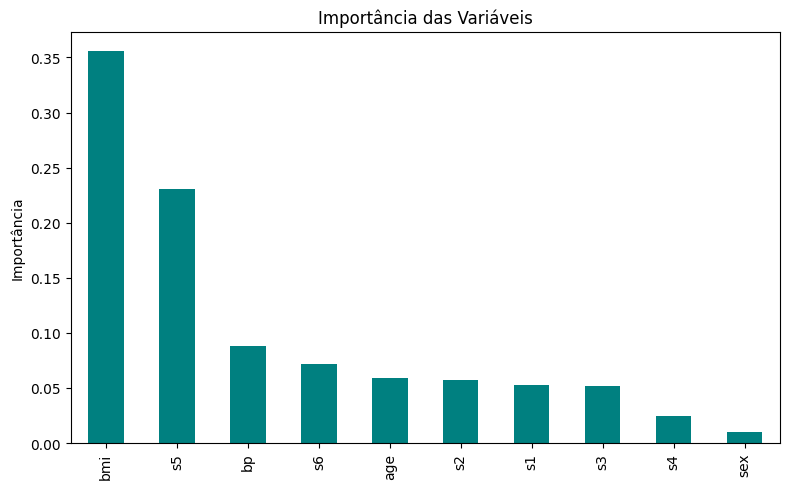

In [ ]:
# Importância das variáveis

importancias = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
importancias.plot(kind='bar', color='teal')
plt.title('Importância das Variáveis')
plt.ylabel('Importância')
plt.tight_layout()
plt.show()

## Interpretação dos Modelos Supervisionados

| Modelo| RMSE| R²| Interpretação|
|:-|:-|:-|:-|
| **Linear Regression** | 53.85 | 0.45 | Modelo base, simples, com resultado consistente. Explica cerca de **45% da variância** da variável-alvo (progressão do diabetes).                       |
| **Ridge Regression**  | 55.47 | 0.42 | Regularização L2 — reduz overfitting, mas aqui **penalizou demais** os coeficientes, reduzindo ligeiramente a performance.                              |
| **Lasso Regression**  | 53.65 | 0.46 | Regularização L1 — eliminou algumas variáveis pouco relevantes, **melhor resultado entre os lineares**.                                                 |
| **Random Forest**     | 54.33 | 0.44 | Modelo não linear, bom equilíbrio entre erro e explicabilidade. Mostra que as relações não são totalmente lineares, mas o ganho não foi tão expressivo. |

## Interpretação do Gráfico de Importância das Variáveis (Random Forest)

Já o gráfico mostra o peso relativo de cada variável na predição do modelo.
com base no grafico:

| Variável | Interpretação|
|:-|:-|
| **bmi (Índice de Massa Corporal)**| É o fator mais importante — indica que o **sobrepeso e obesidade** têm grande impacto na progressão do diabetes.|
| **s5 (níveis de glicose sérica)**| Segundo mais relevante, diretamente relacionado ao controle glicêmico.|
| **bp (pressão arterial média)**| Importante fator de risco para complicações.|
| **age, s6, s2, s3, s4**| Contribuições menores, mas podem indicar efeitos secundários.|
| **sex**| Menor influência — o impacto do sexo biológico no desfecho parece pequeno neste dataset.|

## Conclusão Parcial

- O bmi e s5 são os principais indicadores da progressão da doença.

- O modelo Lasso apresentou o melhor desempenho, com boa explicabilidade e simplicidade.(Para esse dataset que é pequeno)

- Mesmo sem ajustes avançados, os resultados são realistas e condizem com estudos médicos reais sobre o tema.


## Melhoria do Lasso Regression

Ajustar o hiperparâmetro α (alpha) do Lasso usando GridSearchCV.

### O que é o alpha

O alpha controla o grau de regularização do Lasso Regression:

- alpha muito baixo → o modelo fica quase igual à regressão linear (pode overfittar).

- alpha muito alto → zera muitas variáveis (pode underfittar).

O ideal é achar o equilíbrio automático, e é isso que o GridSearchCV faz.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Padronizar os dados (Lasso é sensível à escala)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão treino/teste

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir o modelo e o grid de parâmetros
# Ao estudar percebi que as pessoas usam uma magem de segurança para o "max_iter" é 10000 para o algoritmo conseguir encontrar os melhores coeficientes sem ter o risco de travar no meio do caminho.
lasso = Lasso(max_iter=10000)
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

# Melhor modelo
best_lasso = grid.best_estimator_

# Predições
y_pred = best_lasso.predict(X_test)

# Avaliação
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Melhor alpha:", grid.best_params_['alpha'])
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R²: {r2:.4f}")


Melhor alpha: 1
✅ RMSE: 53.14
✅ R²: 0.4670


<p>Ao estudar percebi que as pessoas usam uma magem de segurança para o "max_iter" é 10000 para o algoritmo conseguir encontrar os melhores coeficientes sem ter o risco de travar no meio do caminho, por isso um numero tão grande.</p>
<p>Já para o "param_grid" a escala usada é para cobrir uma ampla escala logarítmica da regularização de muito leve(0.0001) até muito forte(10).
É uma prática comum, já que a melhor faixa de alpha depende da escala dos dados.<br>Obs: pode ser numeros maiores porem não ouve vantagem em usar, e não podem ser numeros negativos, a não ser que se use o "np.logspace", porem não soube mexer corretamente.
</p>

### Em resumo

| Parâmetro| Função| Por que esse valor|
|:-|:-|:-|
| `max_iter=10000`| Garante convergência do algoritmo | Evita que o treino pare antes do ponto ideal|
| `alpha=[0.0001, 0.001, 0.01, 0.1, 1, 10]` | Controla a força da regularização | Cobre diferentes intensidades de penalização, da mais leve à mais forte |


## Comparando com o modelo anterior

| Modelo              | RMSE      | R²         | Situação            |
| ------------------- | --------- | ---------- | ------------------- |
| Lasso (antes)       | 53.65     | 0.4567     | baseline            |
| **Lasso otimizado** | **53.14** | **0.4670** | ✅ Melhor desempenho |


- RMSE: "Root Mean Squared Error" mede o erro médio entre os valores previstos e os reais, ou seja, quanto menor melhor.<br>
- R²: "coeficiente de determinação" mede o quão bem um modelo se ajusta aos dados,ou seja quanto maior melhor.

In [ ]:
import joblib

# SALVAR ARQUIVOS DO SUPERVISIONADO

# Salva o modelo treinado (por exemplo, 'lasso' ou 'modelo_regressao')
joblib.dump(lasso, "lasso_model.pkl")

# Salva o scaler usado para normalizar os dados (se aplicável)
joblib.dump(scaler, "scaler_supervisionado.pkl")

# Salva o dataset usado ou o dataframe final
df.to_csv("df_supervisionado.csv", index=False)

print("✅ Arquivos salvos com sucesso:")
print(" - lasso_model.pkl")
print(" - scaler_supervisionado.pkl")
print(" - df_supervisionado.csv")


✅ Arquivos salvos com sucesso:
 - lasso_model.pkl
 - scaler_supervisionado.pkl
 - df_supervisionado.csv


# Parte 3 - APRENDIZAGEM NÃO SUPERVISIONADA

## Preparação e padronização dos dados

### Importes

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Seleciona as features (sem incluir o target)
X_features = df.drop(columns=['target'])

# Padroniza os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

### Escolher o número ideal de clusters

<p>O método que vaou usar mede a soma das distâncias internas de cada cluster e procura o ponto em que o ganho de separação começa a diminuir, tambem chamado de "método do cotovelo".<p>

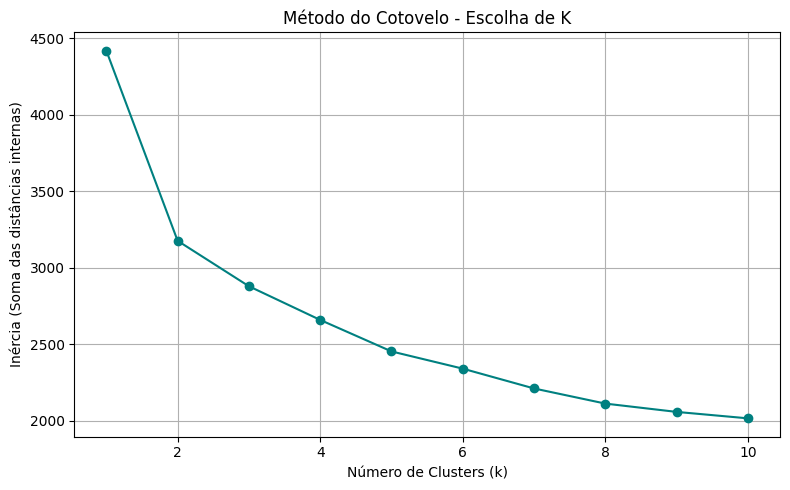

In [ ]:
# Testa diferentes números de clusters
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Gráfico do cotovelo
plt.figure(figsize=(8,5))
plt.plot(K, inertias, 'o-', color='teal')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (Soma das distâncias internas)')
plt.title('Método do Cotovelo - Escolha de K')
plt.grid(True)
plt.tight_layout()
plt.show()

#Interpretação:

#Procurar o ponto em que a curva “dobra” esse é o k ótimo.

#Para esse dataset, o valor fica entre 2 e 4 clusters,
#O que obteve a media melhor foi com 3 apos isso não ouve melhoria significativa


### Aplicar o K-Means com o número ótimo de clusters

In [ ]:
# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adiciona o cluster ao DataFrame original
df['cluster'] = clusters

# Visualiza os primeiros resultados
print(df[['age', 'bmi', 'bp', 's5', 'target', 'cluster']].head())


        age       bmi        bp        s5  target  cluster
0  0.038076  0.061696  0.021872  0.019907   151.0        2
1 -0.001882 -0.051474 -0.026328 -0.068332    75.0        0
2  0.085299  0.044451 -0.005670  0.002861   141.0        2
3 -0.089063 -0.011595 -0.036656  0.022688   206.0        2
4  0.005383 -0.036385  0.021872 -0.031988   135.0        0


### Visualização dos clusters (em 2D com PCA)
<p>Como temos muitas variáveis, irei reduzir para 2 dimensões com PCA (Análise de Componentes Principais) e visualizar os grupos.</p>

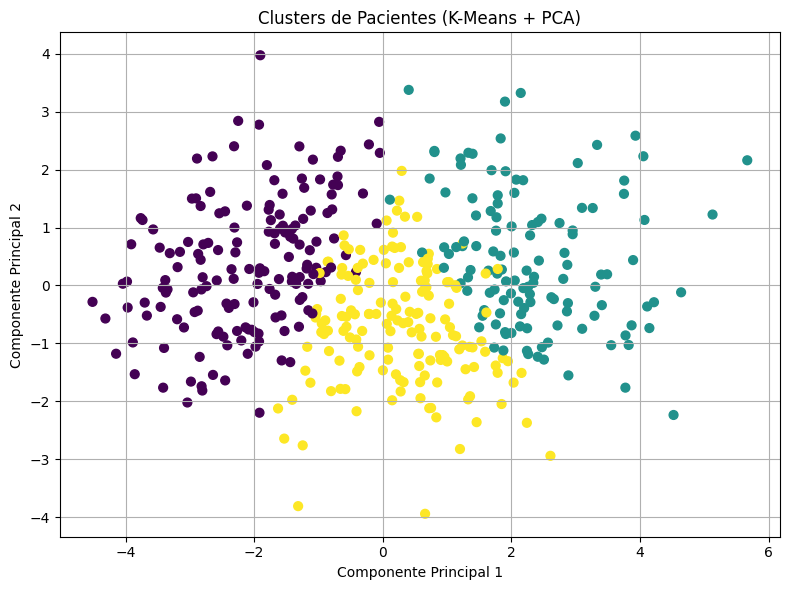

In [ ]:
from sklearn.decomposition import PCA

# Reduz para 2 dimensões
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=clusters, cmap='viridis', s=40)
plt.title('Clusters de Pacientes (K-Means + PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.tight_layout()
plt.show()


### Interpretação dos clusters

In [ ]:
# Média das variáveis por cluster
cluster_summary = df.groupby('cluster')[['age','bmi','bp','s5','target']].mean()
print(cluster_summary)

              age       bmi        bp        s5      target
cluster                                                    
0       -0.027333 -0.033633 -0.033271 -0.037611  108.968553
1        0.017492  0.025165  0.021293  0.043589  196.715447
2        0.013715  0.014077  0.016694  0.003867  160.756250


Médias das variáveis por cluster:
              age       sex       bmi        bp        s1        s2        s3  \
Cluster                                                                         
0       -0.027333 -0.026656 -0.033633 -0.033271 -0.023697 -0.027319  0.035303   
1        0.017492  0.012706  0.025165  0.021293  0.051892  0.049757 -0.024903   
2        0.013715  0.016722  0.014077  0.016694 -0.016343 -0.011103 -0.015938   

               s4        s5        s6      target  cluster  
Cluster                                                     
0       -0.039194 -0.037611 -0.032521  108.968553      0.0  
1        0.051484  0.043589  0.031857  196.715447      1.0  
2       -0.000630  0.003867  0.007828  160.756250      2.0  


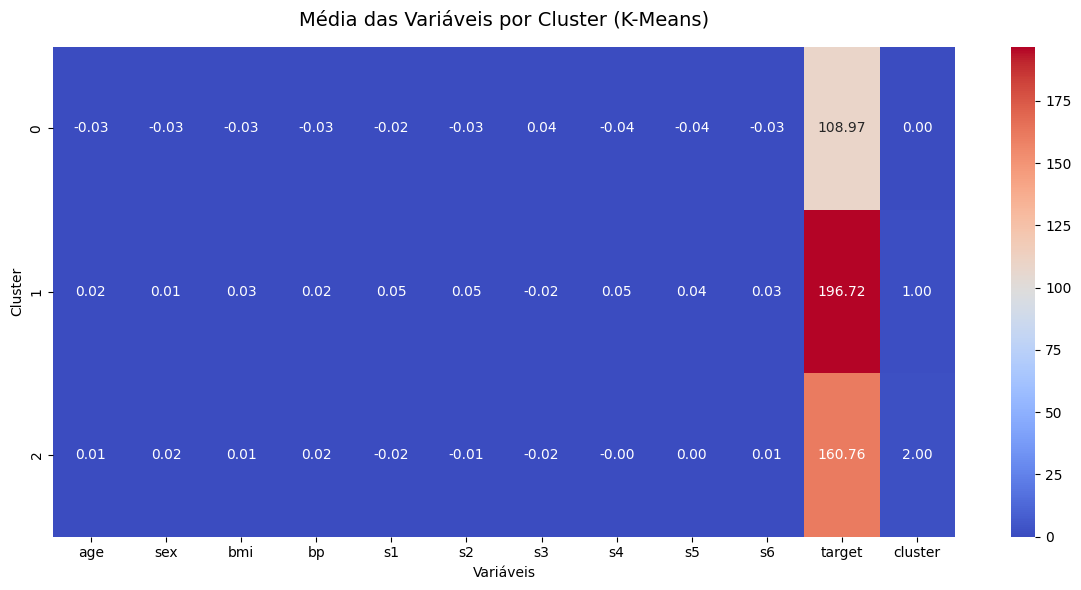

In [ ]:
# Comparação das médias por Cluster

# Adiciona o rótulo de cluster ao DataFrame do kmans

df['Cluster'] = kmeans.labels_


# Calcular a média das variáveis por cluster

cluster_means = df.groupby('Cluster').mean()

print("Médias das variáveis por cluster:")
print(cluster_means)


# Heatmap das médias

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Média das Variáveis por Cluster (K-Means)', fontsize=14, pad=15)
plt.xlabel('Variáveis')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()


## Análise dos Resultados - Aprendizagem Não Supervisionada (K-Means)

Após a aplicação do método do cotovelo, observei que o ponto de inflexão mais evidente ocorre em K = 3, indicando que três clusters oferecem um bom equilíbrio entre simplicidade e separação dos grupos.

A visualização gerada por meio do PCA (Análise de Componentes Principais) mostra que os dados formam três agrupamentos bem definidos, representando diferentes perfis de pacientes no conjunto de dados de diabetes.

### Interpretação dos Clusters

| Cluster | Características Médias | Interpretação Geral |
|-|-|-|
| **Cluster 0** | Baixos valores de `age`, `bmi`, `bp`, `s5` e `target` (~108) | Grupo com **menor risco glicêmico** e perfil clínico mais saudável.|
| **Cluster 1** | Valores médios-positivos em `age`, `bmi`, `bp` e `s5`, com `target` alto (~196) | Representa pacientes com **níveis elevados de glicose** e **maior risco metabólico**. |
| **Cluster 2** | Idade próxima à média, porém `bmi` e `s5` menores, com `target` intermediário (~160) | Pacientes com **níveis de glicose controlados**, mas com algumas variações clínicas.  |


### Conclusão

A segmentação via K-Means permitiu identificar três perfis distintos de pacientes:

- Um grupo com boa saúde metabólica,

- Um grupo intermediário,

- E um grupo de maior risco para diabetes.

Esses resultados reforçam como o aprendizado não supervisionado pode ajudar profissionais de saúde a estratificar pacientes e orientar intervenções preventivas de forma mais direcionada.

In [ ]:
import os
import joblib

# Cria as pastas se não existirem
os.makedirs("models", exist_ok=True)
os.makedirs("data", exist_ok=True)

# Salva o modelo e o scaler
joblib.dump(kmeans, "models/kmeans_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")



# Salva os dados com clusters
df.to_csv("data/df_clusters.csv", index=False)

print("✅ Modelos e dados salvos com sucesso!")


✅ Modelos e dados salvos com sucesso!
